Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [ ]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"



In [ ]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Census_Income_Project.csv",sep='\t')

In [ ]:
#create dataframe
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here Age,Fnlwgt,Education_num,Capital_gain, Capital_loss, Hours_per_week are all has integer data type.And Workclass,Education,Education_num,Marital_status, Occupation, Relationship, Race, Sex,Native_country,Income are all the columns which has string (object)data type.

The prediction task is to determine whether a person makes over $50K a year.So We are going to predict the target column Income which has string data type and it has value either >50k or <=50k.Its like yes or no answer.And it has only two categaries.Hence it is a Binary Classification problem.

In [ ]:
df.columns #checking column names

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


EDA:

In [ ]:
df.isnull().sum() #checking null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

we can observe the people getting <=50000 salary are higher in counts than the people who get more than >50000 salary

(-1.1044047454814914,
 1.105317100846491,
 -1.1045191216407382,
 1.1052027246872442)

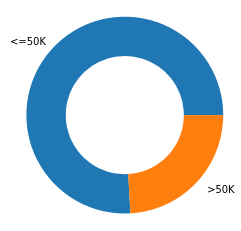

In [ ]:
# value counts of primary fuel column
sorted_counts=df['Income'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

the people getting lesser than or equal to 50000 are higher in counts

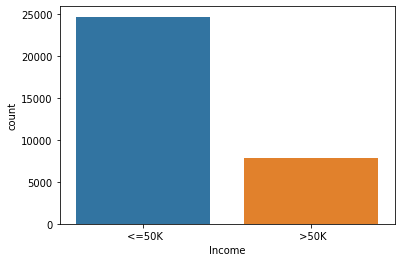

In [ ]:
ax = sns.countplot(x="Income", data=df)

#get column unique values

In [ ]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
#Assigning the values o and 1 to Target column Attrition instead of yes and No for model evaluation 
Num_val = {' <=50K':0, ' >50K':1}
df['Income'] = df["Income"].apply(lambda x: Num_val[x])


replace the (?) empty values with most frequent values

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
import regex

In [ ]:
for col in [ 'Occupation', 'Native_country','Workclass']:
    imp=SimpleImputer(missing_values=" ?",strategy="most_frequent")
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [ ]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df['Native_country'].unique()                     

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

columns are cleaned now and it doesnt have empty (?) values now

In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
cross = pd.crosstab(index = df['Occupation'],columns = df['Income'])
round((cross.T/cross.sum(axis=1)).T,2)

Income,0,1
Occupation,,
Adm-clerical,0.87,0.13
Armed-Forces,0.89,0.11
Craft-repair,0.77,0.23
Exec-managerial,0.52,0.48
Farming-fishing,0.88,0.12
Handlers-cleaners,0.94,0.06
Machine-op-inspct,0.88,0.12
Other-service,0.96,0.04
Priv-house-serv,0.99,0.01


the people whose occupation is Exec-managerial has higher chance of getting income > 50k

In [ ]:
cross = pd.crosstab(index= df['Relationship'],columns = df['Income'])
round(((cross.T)/cross.sum(axis =1)).T,2)

Income,0,1
Relationship,,
Husband,0.55,0.45
Not-in-family,0.90,0.10
Other-relative,0.96,0.04
Own-child,0.99,0.01
Unmarried,0.94,0.06
Wife,0.52,0.48


Husband and wife relation having higher chance of getting income >50k

In [ ]:
df.groupby(['Workclass'])['Income'].value_counts()


Workclass          Income
 Federal-gov       0           589
                   1           371
 Local-gov         0          1476
                   1           617
 Never-worked      0             7
 Private           0         19378
                   1          5154
 Self-emp-inc      1           622
                   0           494
 Self-emp-not-inc  0          1817
                   1           724
 State-gov         0           944
                   1           353
 Without-pay       0            14
Name: Income, dtype: int64

we can observe that the private working people are getting income>50k mostly

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

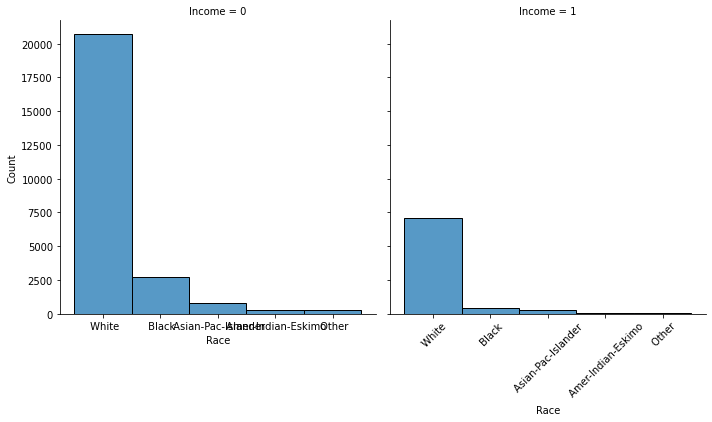

In [ ]:
ax=sns.displot(df, x="Race", col="Income")
plt.xticks(rotation=45)

the people who earns <=50k are higher in counts than people who earns more than >50k

in the catgory of people who earns >50k,white people's earning number is high than other races's counts

In [ ]:
df.groupby(['Race'])['Income'].value_counts()

Race                 Income
 Amer-Indian-Eskimo  0           275
                     1            36
 Asian-Pac-Islander  0           763
                     1           276
 Black               0          2737
                     1           387
 Other               0           246
                     1            25
 White               0         20698
                     1          7117
Name: Income, dtype: int64

the white people who earns more than 50k are higher in count than all other races

In [ ]:
cross = pd.crosstab(index = df['Sex'],columns = df['Income'])
round(((cross.T)/cross.sum(axis=1)).T,2)

Income,0,1
Sex,,
Female,0.89,0.11
Male,0.69,0.31


the males are getting 50k are higher in counts than female

([0, 1], <a list of 2 Text major ticklabel objects>)

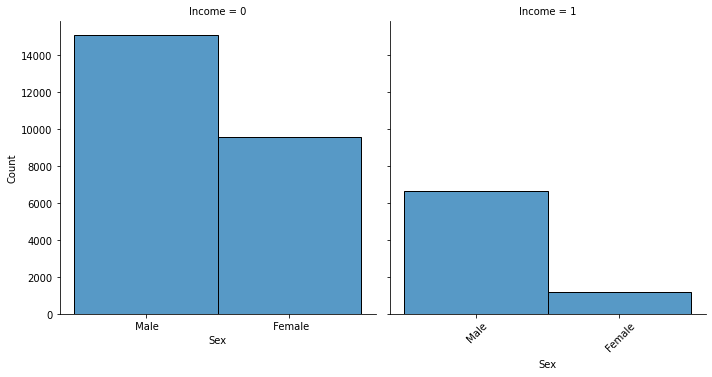

In [ ]:
ax=sns.displot(df, x="Sex", col="Income")
plt.xticks(rotation=45)

higher no of people doesn't earn more than (>50k).And no of male earns >50k is higher than female in both categories above

In [ ]:
df.groupby(['Sex'])['Income'].value_counts()

Sex      Income
 Female  0          9592
         1          1179
 Male    0         15127
         1          6662
Name: Income, dtype: int64

no of male earns >50k is higher than no of female 

In [ ]:
cross = pd.crosstab(index = df['Age'],columns = df['Income'])
round(((cross.T)/cross.sum(axis=1)).T,2)

Income,0,1
Age,,
17,1.00,0.00
18,1.00,0.00
19,1.00,0.00
20,1.00,0.00
21,1.00,0.00
...,...,...
85,1.00,0.00
86,1.00,0.00
87,1.00,0.00


the people in the dataset are all having ages 16+ only it is taken and their respective incomes <=50k or >50k are calculated

this shows clearly that the people who earns above 50k are lower in number of counts in terms of age.there are only few people in age 35-55 who earns more than 50k and all there are so many no of people who are in ages 20-60 mostly earns less than or equal to 50k only

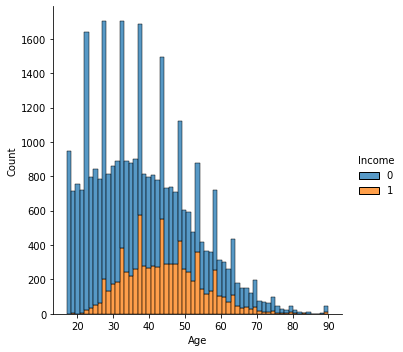

In [ ]:
sns.displot(df, x="Age", hue="Income", multiple="stack")

people makes <=50k are higher in numbers in all ages

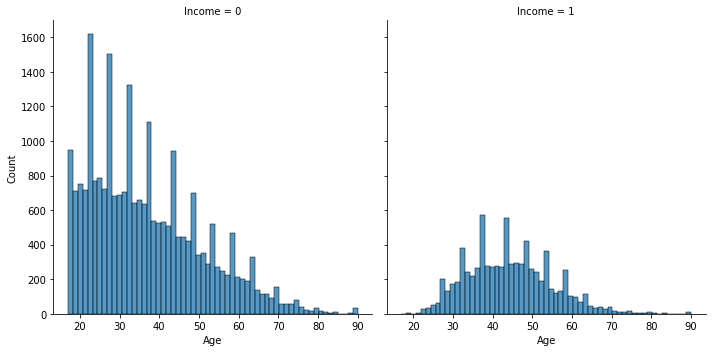

In [ ]:
sns.displot(df, x="Age", col="Income")

higher no of people accross all ages earns <=50k only

In [ ]:
cross = pd.crosstab(index = df['Fnlwgt'],columns = df['Income'])
round(((cross.T)/cross.sum(axis=1)).T,2)

Income,0,1
Fnlwgt,,
12285,1.0,0.0
13769,1.0,0.0
14878,0.0,1.0
18827,1.0,0.0
19214,1.0,0.0
...,...,...
1226583,0.0,1.0
1268339,1.0,0.0
1366120,1.0,0.0


 shows counts of people with Fnlwgt	weighted tallies and seggregated and counted according to their earrning income

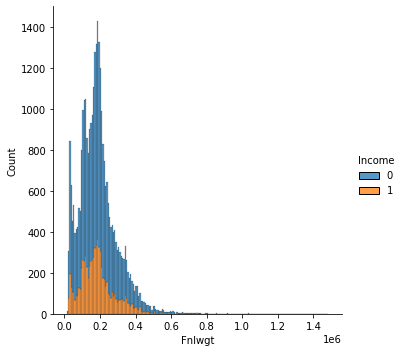

In [ ]:
sns.displot(df, x="Fnlwgt", hue="Income", multiple="stack")

weighted tallies attribute are having the people higher in number of counts who earns<50k than the people who earns >50k

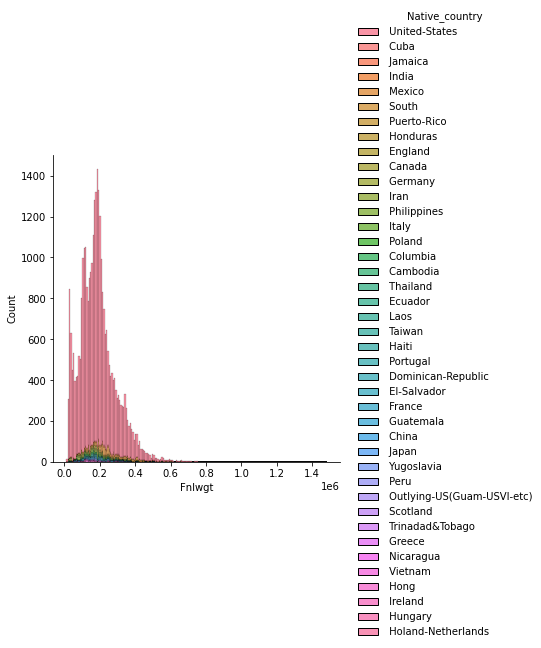

In [ ]:
sns.displot(df, x="Fnlwgt", hue="Native_country", multiple="stack")

weighted tallies are higher in counts in US and cuba

so we can conclude from above all origin people who earns >50k are lesser in numbers than people who earns <=50k

In [ ]:
df_cat = df[[ 'Workclass', 'Education','Marital_status', 'Occupation','Race', 'Sex']]

In [ ]:
list(enumerate(df_cat))

[(0, 'Workclass'),
 (1, 'Education'),
 (2, 'Marital_status'),
 (3, 'Occupation'),
 (4, 'Race'),
 (5, 'Sex')]

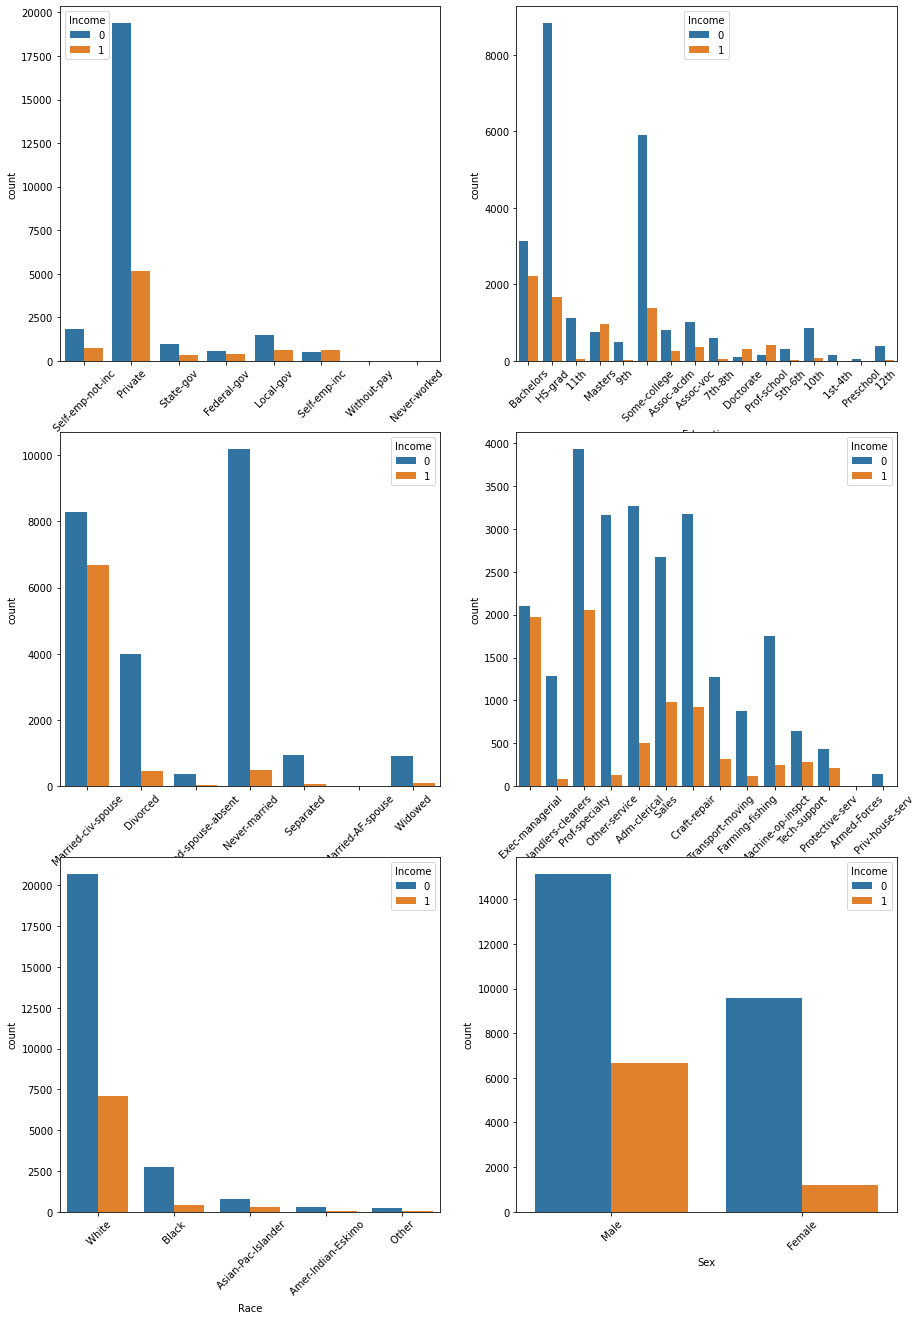

In [ ]:
plt.figure(figsize=(15,30))
for i in enumerate(df_cat):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(i[1],hue="Income",data=df)
    plt.xticks(rotation=45)

1.private employees earns >50k are more in counts
2.bachelors earns >50k  are more in counts
3.married couples earns >50k  are more in counts
4.prof-speciality earns >50k  are more in counts
5.white people earns >50k  are more in counts
6.male people earns >50k  are more in counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

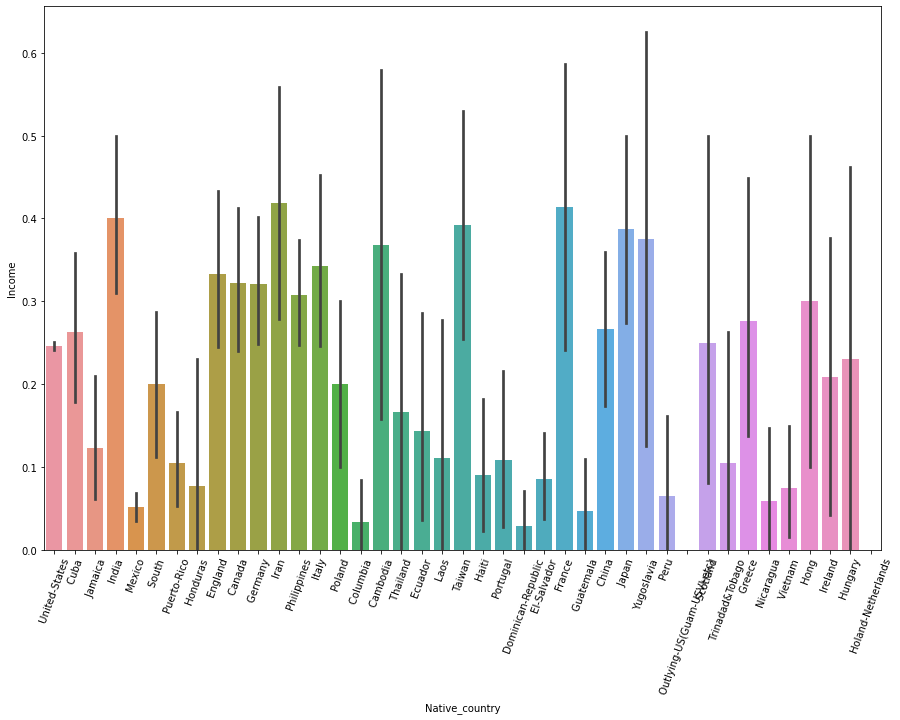

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='Native_country',y='Income',data=df)
plt.xticks(rotation=70)

the no of people in iran earns >50k are more than other countries

In [ ]:
cross = pd.crosstab(index= df['Native_country'],columns = df['Income'])
round(((cross.T)/cross.sum(axis =1)).T,2)

Income,0,1
Native_country,,
Cambodia,0.63,0.37
Canada,0.68,0.32
China,0.73,0.27
Columbia,0.97,0.03
Cuba,0.74,0.26
Dominican-Republic,0.97,0.03
Ecuador,0.86,0.14
El-Salvador,0.92,0.08
England,0.67,0.33


the no of people in iran earns >50k are more than other countries

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

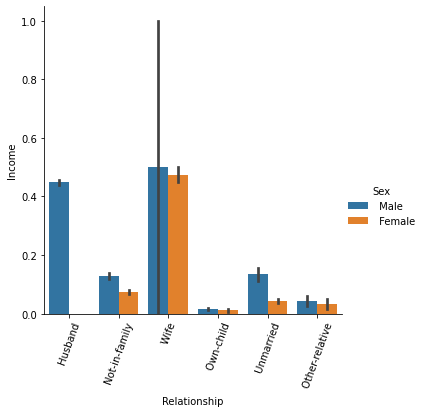

In [ ]:
sns.catplot(x="Relationship",y="Income",hue="Sex",data=df,kind="bar")
plt.xticks(rotation=70)

especially the females who are wife earns >50k are more in counts than other relations and male counterpart too

In [ ]:
df_num=df[['Age','Fnlwgt','Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week','Income']]

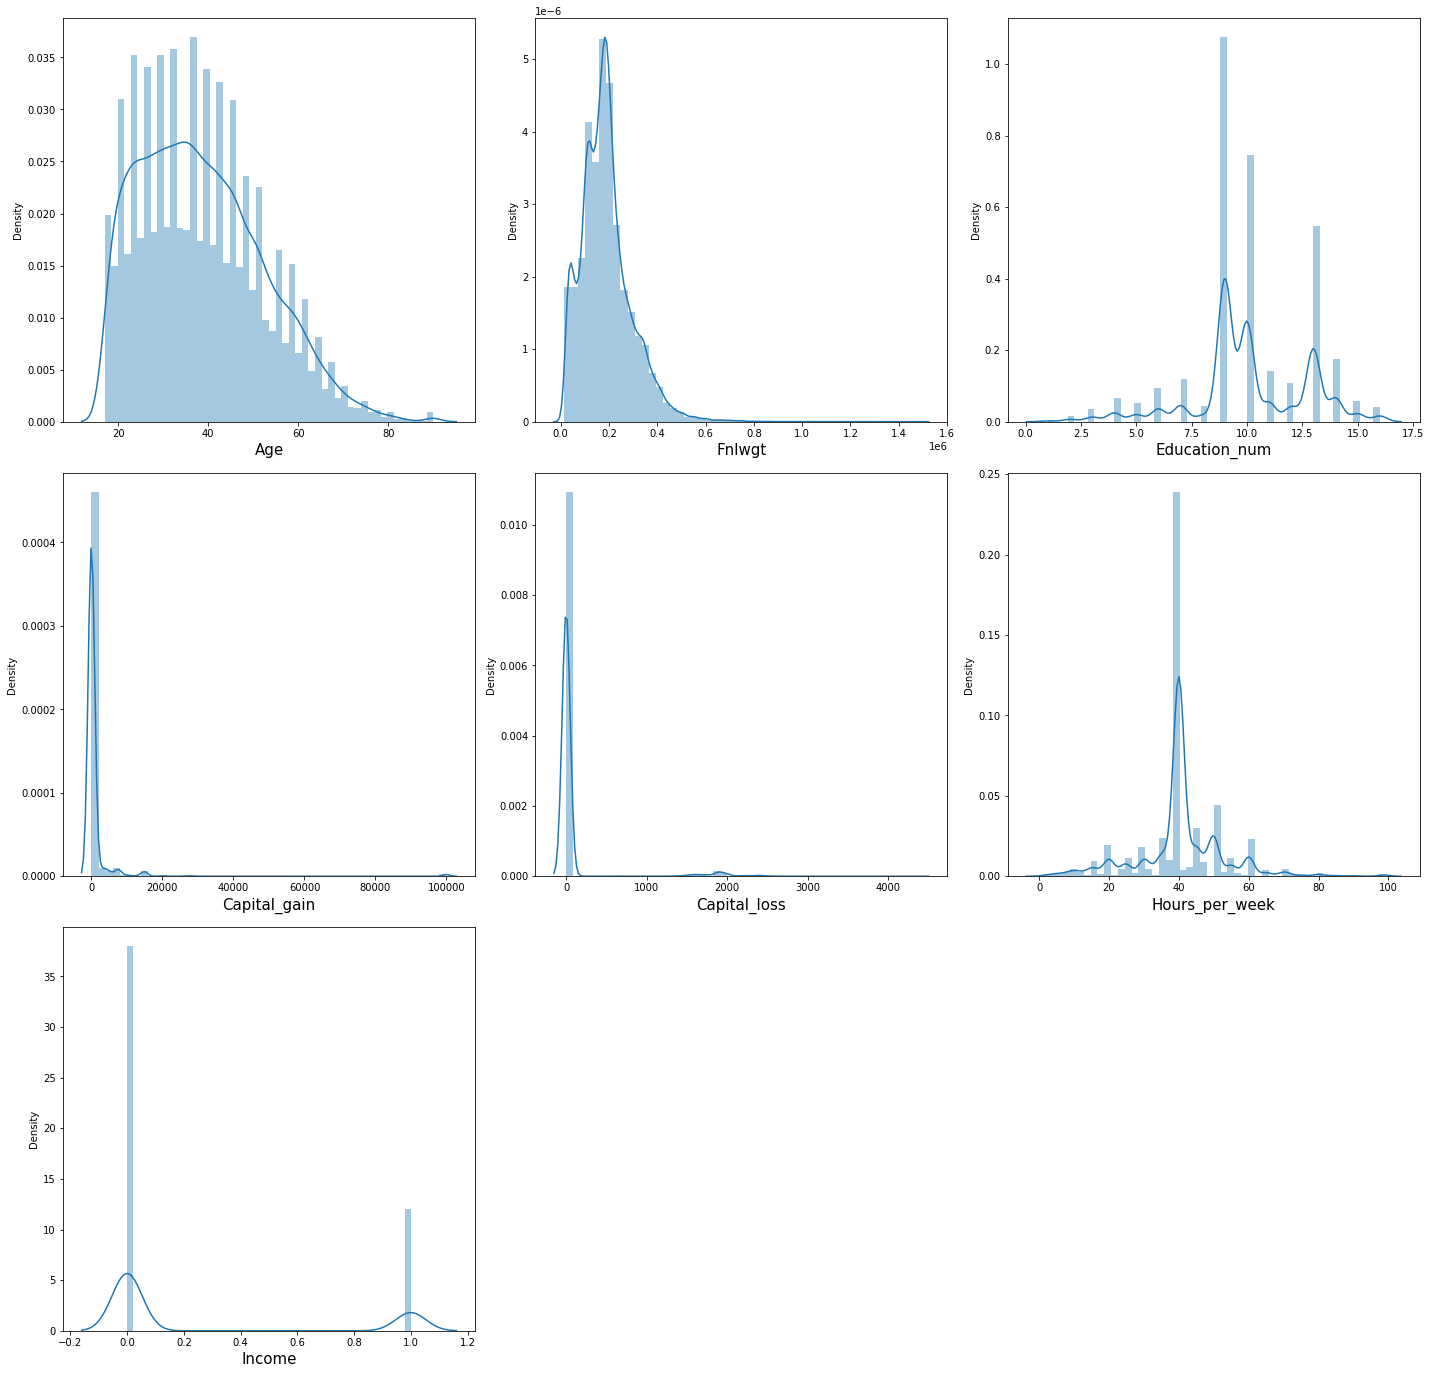

In [ ]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_num:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

all data columns has slight skewness in distributions

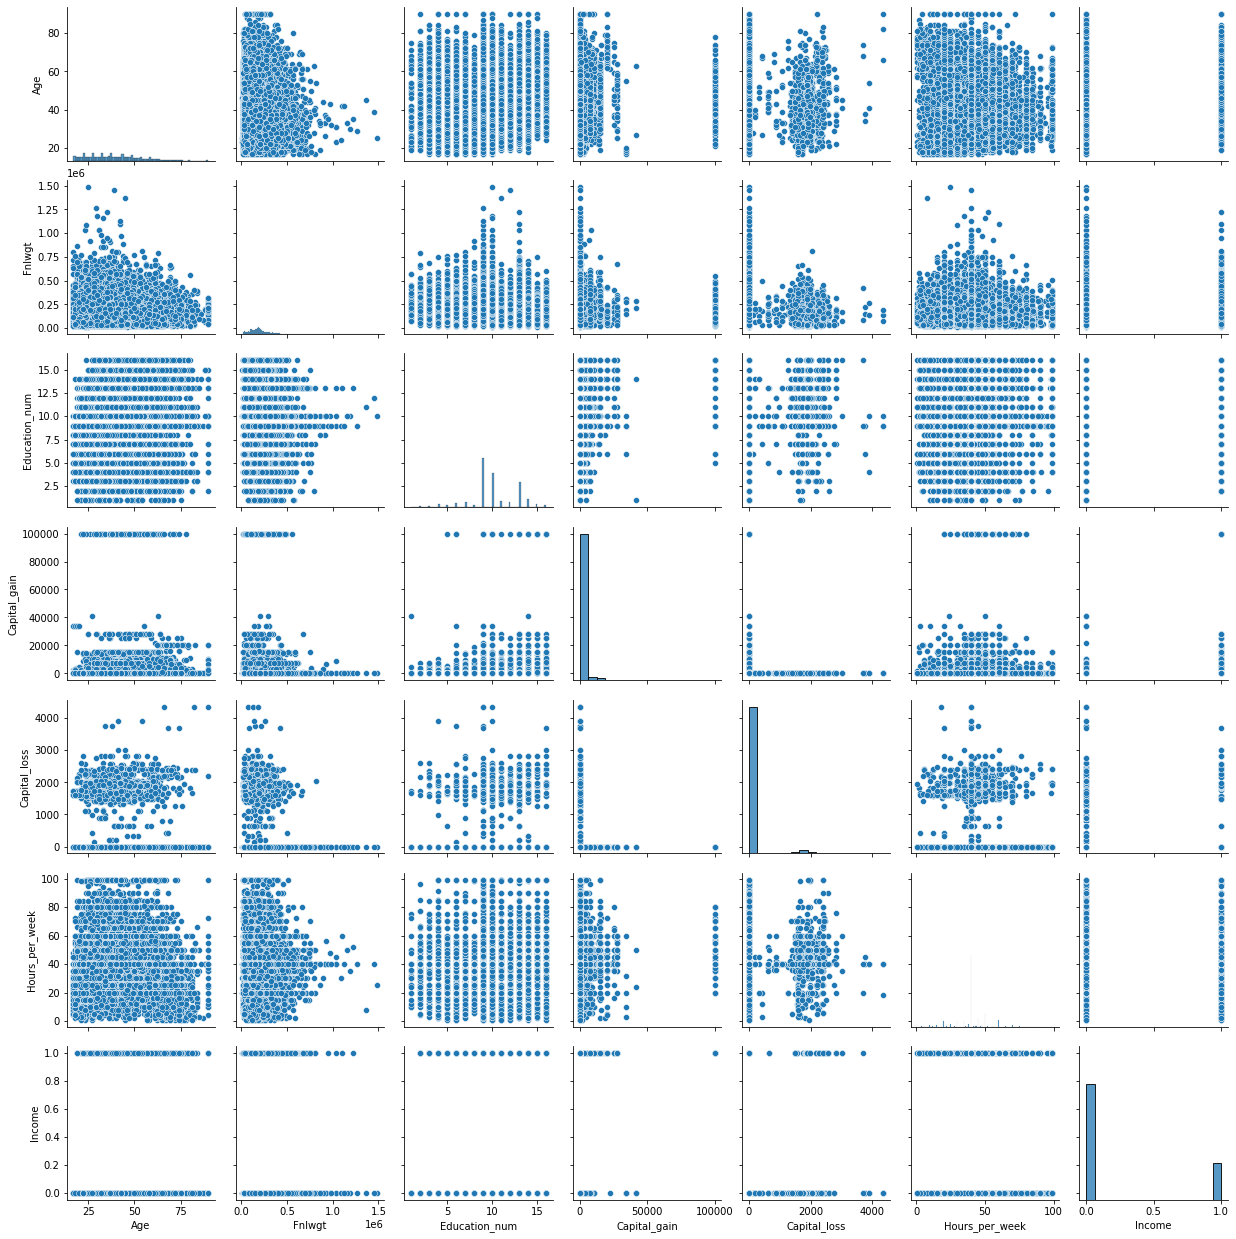

In [ ]:
sns.pairplot(df_num)
plt.show()

this is multivariate analysis.this graph shows correlation between the two variables.that is ,if either one decreases or increases what will be the impact on the target variable.

e.g:
we can observe when income is lower the capital gain is low
when income is higher the capital loss is low
hours per week work doesnt show much imapct on the target variable Income
fnlwgt is high when income is low and fnlwght is low when income is high.so we can conclude that the number of people getting >50k is very less in count



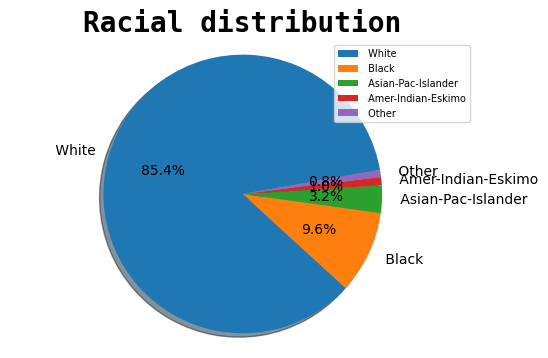

In [ ]:
# Creating a pie chart for 'Marital status'
marital = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Racial distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

white people earns more than other people overall

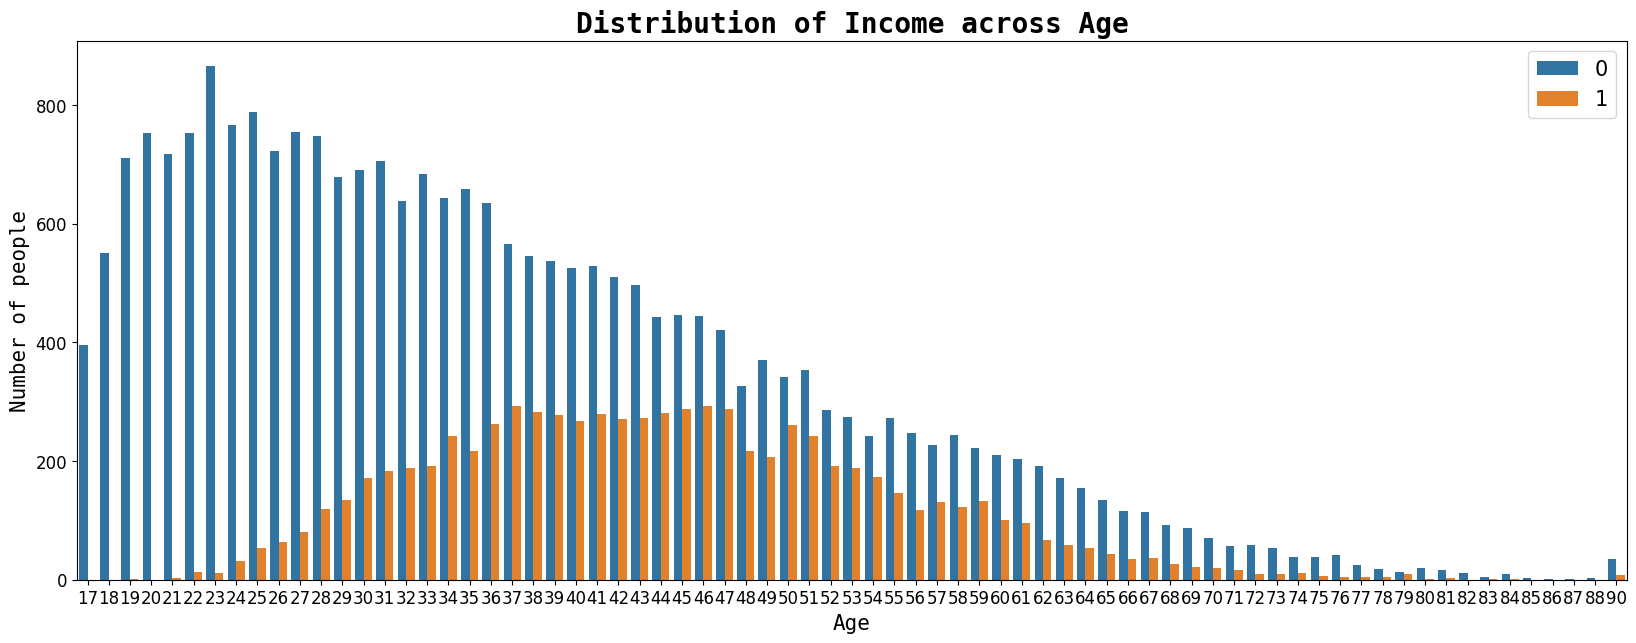

In [ ]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


this shows that the more no of people earns only <=50k and they are in the range of age of 17 to 5o mostly
the people are in range of age of 33 to 52 are middle aged people who earns income >50k

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

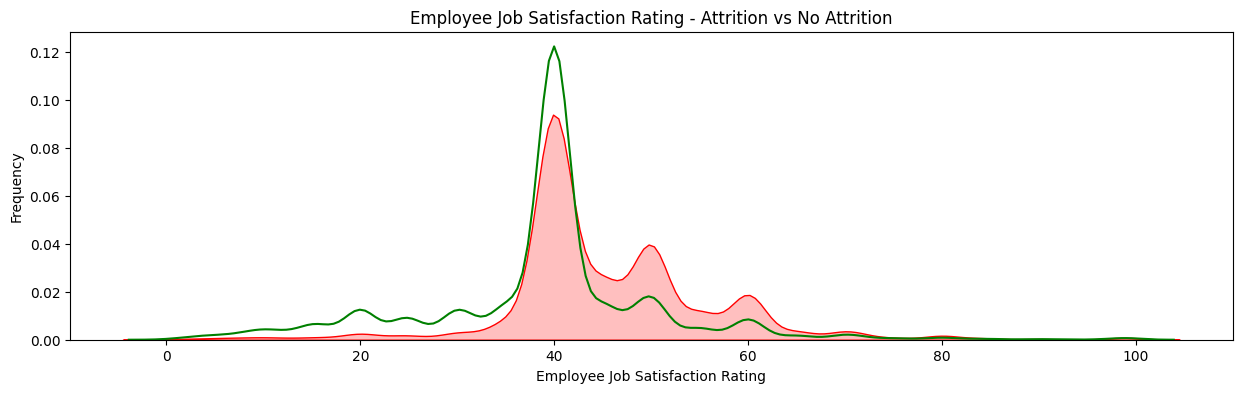

In [ ]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Income']==0),'Hours_per_week'],color='g',shade=False,label=' <=50K')
ax=sns.kdeplot(df.loc[(df['Income']==1),'Hours_per_week'],color='r',shade=True,label=' >50K')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

in overall ,the number of people who earns <=50k is only high in counts
the number of people who earns >50k is very less in count

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

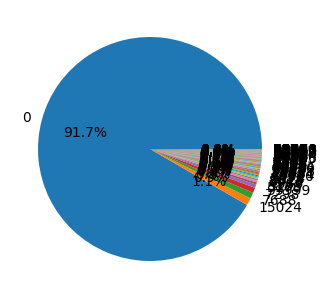

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
df['Capital_gain'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
df['Capital_gain'].value_counts()

this valucounts and the graph shows that capital gain has more number of zero values as 91.7% in overall so we can drop this column

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

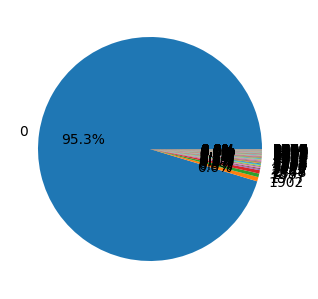

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
df['Capital_loss'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
df['Capital_loss'].value_counts()

this valucounts and the graph shows that capital loss has more number of zero values as 91.7% in overall so we can drop this column

DATA PRE-PROCESSING And FEATURE ENGINEERING

In [ ]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
#find correlation co.efficient of all variables in table
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


eductaion num is the most positively correlated with the target column Income and raltionship  and marital status is the most negatively correlated with the target column.workclass has less correlation with the target column

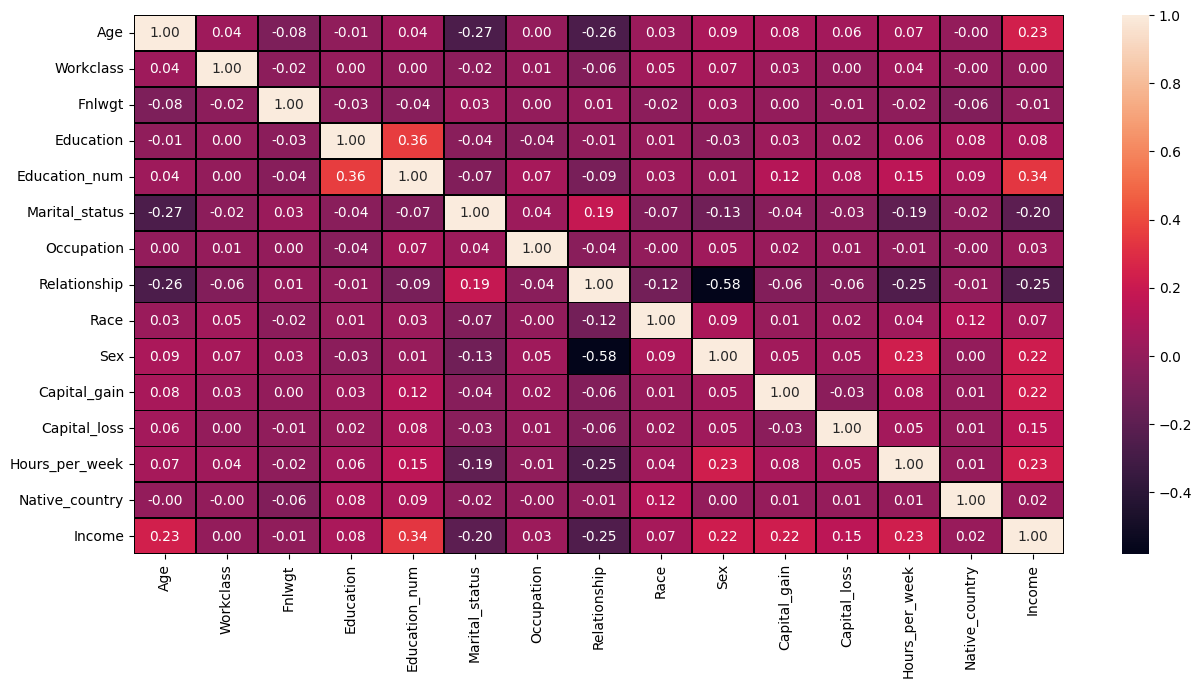

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

here we can drop the columns which very less correlation with the target

if education increases income increases
if relationships increases income decreases.

In [ ]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000



in capital gain,capital loss there is so much of gap between the 75% and the max.there are outliers and skewness because it has many number of missing values.
other columns are ok.the mean and std dev is not also much close to 0

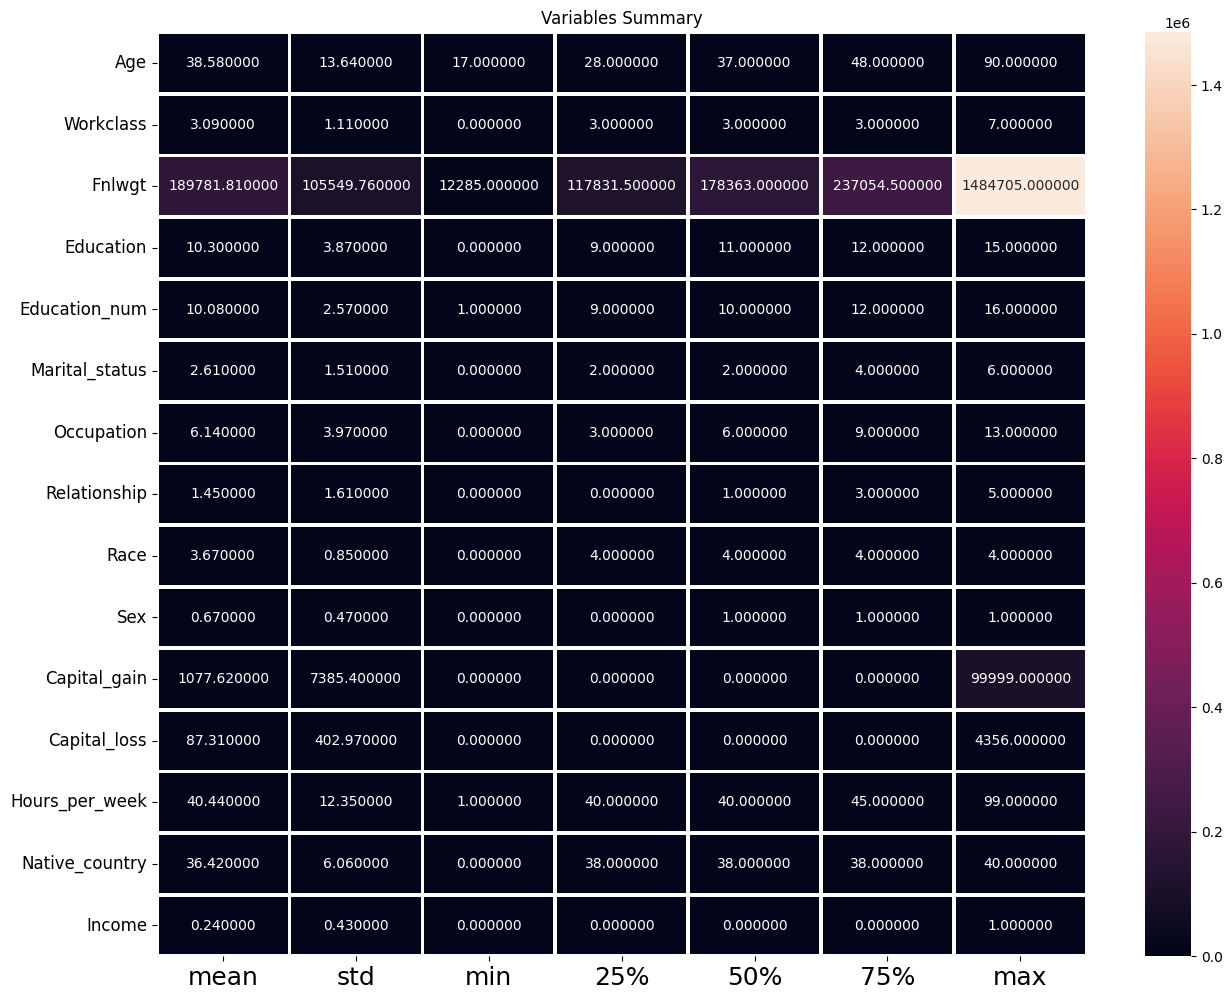

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [ ]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
#VIF calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.shape

(32560, 15)

In [ ]:
df.shape[1]

15

In [ ]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,Age,8.975322
1,Workclass,8.473204
2,Fnlwgt,4.043222
3,Education,9.258355
4,Education_num,20.127613
5,Marital_status,4.160015
6,Occupation,3.386616
7,Relationship,2.703775
8,Race,17.897167
9,Sex,4.526252


In [ ]:
#drop unwanted columns
df.drop(['Capital_gain', 'Capital_loss','Workclass'], axis=1, inplace=True)

In [ ]:
calc_vif(df)

,Variables,VIF FACTOR
0,Age,8.804537
1,Fnlwgt,4.038552
2,Education,9.247029
3,Education_num,19.990561
4,Marital_status,4.139158
5,Occupation,3.382600
6,Relationship,2.688326
7,Race,17.589261
8,Sex,4.477251
9,Hours_per_week,11.925531


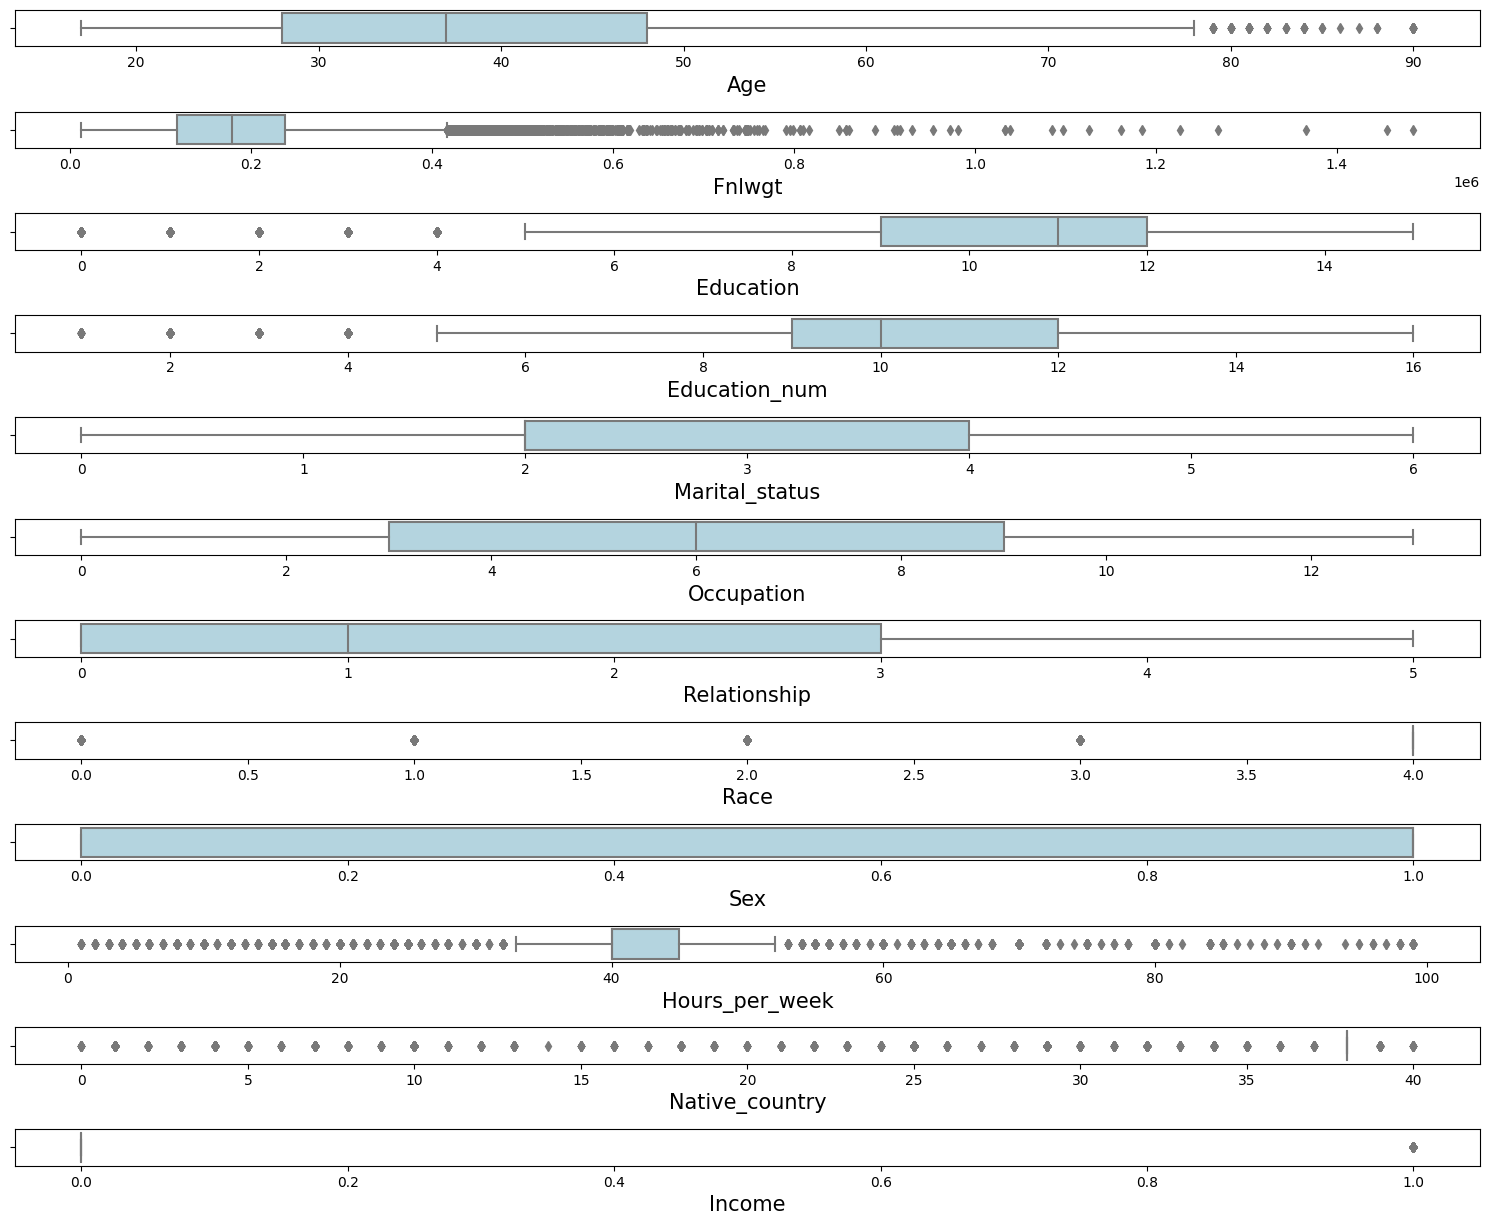

In [ ]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

there are outliers present in columns

In [ ]:
df.skew()

Age               0.558738
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

In [ ]:
df.shape

(32560, 12)

some skewness are present in the dataset

#checking Z-score to remove outliers

In [ ]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(32560, 12)

In [ ]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552]), array([10,  9,  7, ...,  7,  7,  7]))


In [ ]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32560, 12)
(29309, 12)


some outliers got removed

In [ ]:
#finds data loss
loss_percent=(32560-29309)/(32560*100)
print(loss_percent)

0.0009984643734643735


since data percentage loss is too low and its cleaned now

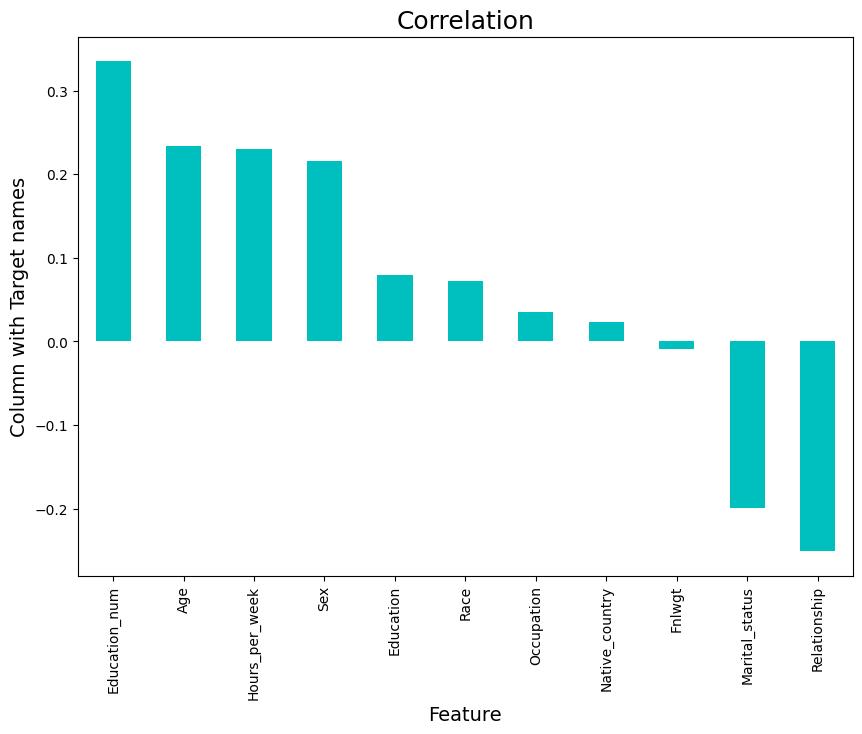

In [ ]:
plt.figure(figsize=(10,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

this graph shows the positive and negative correlation of each variables with target column

In [ ]:
df_new


,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,83311,9,13,2,3,0,4,1,13,38,0
1,38,215646,11,9,0,5,1,4,1,40,38,0
2,53,234721,1,7,2,5,0,2,1,40,38,0
4,37,284582,12,14,2,3,5,4,0,40,38,0
5,49,160187,6,5,3,7,1,2,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,12,5,4,0,38,38,0
32556,40,154374,11,9,2,6,0,4,1,40,38,1
32557,58,151910,11,9,6,0,4,4,0,40,38,0
32558,22,201490,11,9,4,0,3,4,1,20,38,0


In [ ]:
df_new.shape

(29309, 12)

In [ ]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [ ]:
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

Ratio above 50k:  24.29%


SKEWNESS REMOVAL AND SCALING

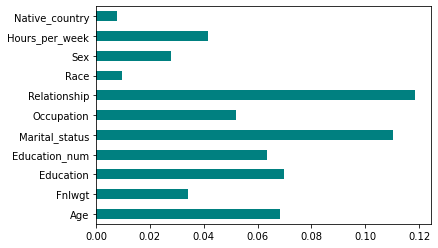

In [ ]:
#selecting feature for to predict the target
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [ ]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.91159054, -1.12627796, -0.49790537, ...,  0.70392453,
        -2.22563253,  0.15665417],
       [ 0.10754503,  0.41555945,  0.07353798, ...,  0.70392453,
        -0.05603165,  0.15665417],
       [ 1.08894874,  0.59610125, -2.08604048, ...,  0.70392453,
        -0.05603165,  0.15665417],
       ...,
       [ 1.36803963, -0.24767947,  0.07353798, ..., -1.42060683,
        -0.05603165,  0.15665417],
       [-1.34658868,  0.27686998,  0.07353798, ...,  0.70392453,
        -1.73217691,  0.15665417],
       [ 1.03070979,  1.06741983,  0.07353798, ..., -1.42060683,
        -0.05603165,  0.15665417]])

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.51229651 0.37285168 0.54983946 ... 1.         0.48742095 0.17746271]
 [0.49558182 0.50789174 0.71843726 ... 0.         0.5618728  0.17746271]
 [0.40670623 0.60779499 0.471685   ... 1.         0.48742095 0.17746271]
 ...
 [0.5761099  0.59814982 0.         ... 0.         0.27959746 0.17746271]
 [0.51229651 0.78612974 0.         ... 0.         0.34605576 0.17746271]
 [0.67777319 0.34230019 0.63214128 ... 1.         0.71746008 0.17746271]]
[[0.0309514  0.51323175 0.02575058 ... 0.         0.15675893 0.17746271]
 [0.60635696 0.64759797 0.39785253 ... 0.         0.35970426 0.17746271]
 [0.42524553 0.41122071 0.39785253 ... 1.         0.79832927 0.17746271]
 ...
 [0.32810302 0.77872143 0.63214128 ... 1.         0.472818   0.17746271]
 [0.49558182 0.27661692 0.63214128 ... 0.         0.         0.17746271]
 [0.62110249 0.75241622 0.63214128 ... 0.         0.03280358 0.17746271]]


In [ ]:
##The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)
###so we are balancing the classes with smote technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_train_res, y_train_res = sm.fit_resample(new_xtrain, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 5706
Before OverSampling, counts of label '0': 17741 

After OverSampling, the shape of train_X: (35482, 11)
After OverSampling, the shape of train_y: (35482,) 

After OverSampling, counts of label '1': 17741
After OverSampling, counts of label '0': 17741


MODEL PREDICTION

LOGSITIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [ ]:
lr=LogisticRegression()




In [ ]:
for i in range(0,100):
   
    lr.fit(x_train_res, y_train_res.ravel())
    pred_train=lr.predict(x_train_res)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

#cv score

In [ ]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 3
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 4
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 5
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 6
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 7
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 8
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468


At cv:- 9
cross validation score is: 74.75264414875468
accuracy score is: 74.75264414875468




parameter tuning

In [ ]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)


{'dual': False, 'fit_intercept': True, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [ ]:
lr=LogisticRegression(fit_intercept= True, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_res,y_train_res.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_res)
lr_score = lr.score(x_train_res,y_train_res)
lr_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 74.75264414875468
score of model is: 76.2414745504763


In [ ]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 81.24808606247159


In [ ]:
print(classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      4450
           1       0.48      0.78      0.60      1412

    accuracy                           0.75      5862
   macro avg       0.70      0.76      0.71      5862
weighted avg       0.81      0.75      0.76      5862



In [ ]:
print(confusion_matrix(y_test,pred_test))

[[3284 1166]
 [ 314 1098]]


In [ ]:
print(accuracy_score(y_test,pred_test)*100)

74.75264414875468


AUc-ROC Curve

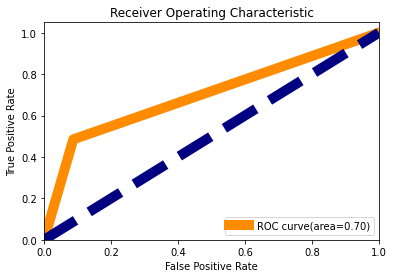

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

RANDOM FOREST CLASSIFIER

In [ ]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_res,y_train_res.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  82.08802456499488


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 99.98872667831577
Accuracy Score of Testing Data is: 82.08802456499488


In [ ]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train_res, y_train_res.ravel())
    pred_train_rf=rf.predict(x_train_res)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [ ]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 82.08802456499488


In [ ]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 3
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 4
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 5
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 6
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 7
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 8
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488


At cv:- 9
cross validation score is: 82.08802456499488
accuracy score is: 82.08802456499488




parameter tuning

In [ ]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [ ]:
rf=RandomForestClassifier(criterion="entropy",max_features="auto",n_estimators=50,random_state=2,bootstrap="True",min_weight_fraction_leaf= 0.1)
rf.fit(x_train_res,y_train_res.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
rf_score = rf.score(x_train_res,y_train_res)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 74.75264414875468
score of model is: 76.46130432331887


In [ ]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 80.88299500232587


In [ ]:
print(confusion_matrix(y_test,pred_test_rf))

[[3144 1306]
 [ 256 1156]]


In [ ]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      4450
           1       0.47      0.82      0.60      1412

    accuracy                           0.73      5862
   macro avg       0.70      0.76      0.70      5862
weighted avg       0.82      0.73      0.75      5862



AUC-ROC CURVE:

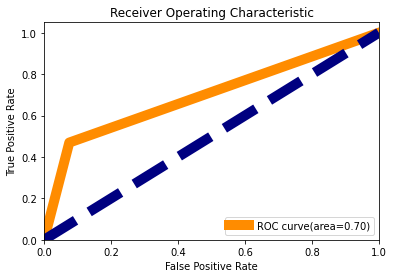

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_res, y_train_res.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_res)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  76.35619242579324


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 99.99154500873682
Accuracy Score of Testing Data is: 76.35619242579324


parameter tuning

In [ ]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 3, 'splitter': 'best'}


In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train_res,y_train_res.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_res)
dt_score = dt.score(x_train_res,y_train_res.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 73.76322074377346
score of model is: 79.30499971816695


In [ ]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 82.21023191017238


In [ ]:
print(confusion_matrix(y_test,pred_test_dtc))

[[3680  770]
 [ 616  796]]


In [ ]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4450
           1       0.51      0.56      0.53      1412

    accuracy                           0.76      5862
   macro avg       0.68      0.70      0.69      5862
weighted avg       0.77      0.76      0.77      5862



AUC-ROC CURVE:

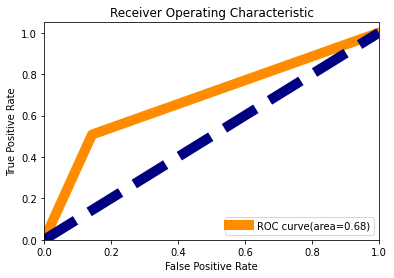

In [ ]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dtc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 68%

KNEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res.ravel())
pred_test_knn = knn.predict(new_xtest)
pred_train_knn = knn.predict(x_train_res)
knn_score = knn.score(new_xtest,y_test)
print('score of model is : ',knn_score*100)



score of model is :  76.40736949846469


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 89.82019051913646
Accuracy Score of Testing Data is: 76.40736949846469


parameter tuning

In [ ]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train_res,y_train_res.ravel())
pred_test_knn=knn.predict(new_xtest)
pred_train_knn=knn.predict(x_train_res)
knn_score = knn.score(x_train_res,y_train_res.ravel())
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 77.9767997270556
score of model is: 89.9131954230314


In [ ]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 81.72916626282097


In [ ]:
print(confusion_matrix(y_test,pred_test_knn))

[[3563  887]
 [ 404 1008]]


In [ ]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4450
           1       0.53      0.71      0.61      1412

    accuracy                           0.78      5862
   macro avg       0.72      0.76      0.73      5862
weighted avg       0.81      0.78      0.79      5862



AUC-ROC CURVE:

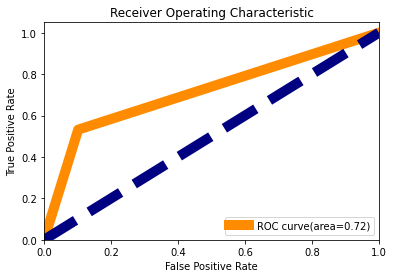

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_knn,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%

GAUSSIANNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_res, y_train_res.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_res)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  72.75673831456841


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 74.7449410968942
Accuracy Score of Testing Data is: 72.75673831456841


parameter tuning

In [ ]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'var_smoothing': 0.0012328467394420659}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.2s finished


In [ ]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train_res,y_train_res.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_res)
gnb_score = gnb.score(x_train_res,y_train_res.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 67.09314227226203
score of model is: 72.25071867425737


In [ ]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 76.24962606071708


In [ ]:
print(confusion_matrix(y_test,pred_test_gnb))

[[2805 1645]
 [ 284 1128]]


In [ ]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.91      0.63      0.74      4450
           1       0.41      0.80      0.54      1412

    accuracy                           0.67      5862
   macro avg       0.66      0.71      0.64      5862
weighted avg       0.79      0.67      0.69      5862



AUC-ROC CURVE:

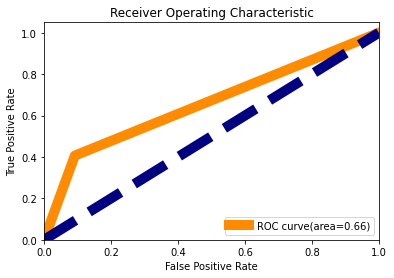

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 66%

SUPPROT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_res, y_train_res.ravel())
pred_test_svc = svc.predict(new_xtest)
pred_train_svc = svc.predict(x_train_res)
svc_score = svc.score(new_xtest,y_test)
print('score of model is : ',svc_score*100)

score of model is :  76.88502217673148


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 80.92272137985458
Accuracy Score of Testing Data is: 76.88502217673148


parameter tuning

In [ ]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': False, 'tol': 0.01}


In [ ]:
svc=SVC(kernel='rbf',gamma='scale',degree= 3,max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train_res,y_train_res.ravel())
pred_test_svc=svc.predict(new_xtest)
pred_train_svc=svc.predict(x_train_res)
svc_score = svc.score(x_train_res,y_train_res.ravel())
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 74.75264414875468
score of model is: 80.91990304943351


In [ ]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 82.52413425524828


In [ ]:
print(confusion_matrix(y_test,pred_test_svc))

[[3270 1180]
 [ 175 1237]]


In [ ]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4450
           1       0.51      0.88      0.65      1412

    accuracy                           0.77      5862
   macro avg       0.73      0.81      0.74      5862
weighted avg       0.84      0.77      0.78      5862



AUC-ROC CURVE:

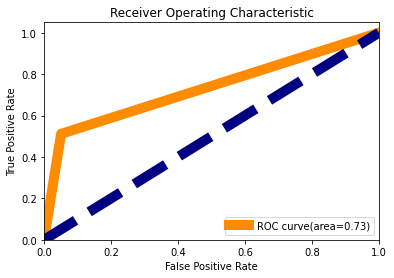

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_svc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train_res, y_train_res)
pred_test_gb = gb.predict(new_xtest)
pred_train_gb = gb.predict(x_train_res)
gb_score = gb.score(new_xtest,y_test)
print('score of model is : ',gb_score*100)




score of model is :  80.43329921528488


In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 84.43717941491461
Accuracy Score of Testing Data is: 80.43329921528488


parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','mse'],'n_estimators':[150],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'criterion': 'mse', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 150, 'random_state': 0}


In [ ]:
gb=GradientBoostingClassifier(criterion="mse",n_estimators=100,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train_res,y_train_res.ravel())
pred_test_gb=gb.predict(new_xtest)
pred_train_gb=gb.predict(x_train_res)
gb_score = gb.score(x_train_res,y_train_res.ravel())
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 74.75264414875468
score of model is: 82.13742179133081


In [ ]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 83.43172265990847


In [ ]:
print(confusion_matrix(y_test,pred_test_gb))

[[3508  942]
 [ 241 1171]]


In [ ]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4450
           1       0.55      0.83      0.66      1412

    accuracy                           0.80      5862
   macro avg       0.74      0.81      0.76      5862
weighted avg       0.84      0.80      0.81      5862



AUC-ROC CURVE:

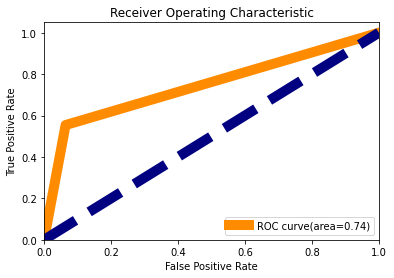

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 74%

LIGHT GRADIENT BOOSTING CLASSIFIER

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_res, y_train_res.ravel())
pred_test_lgbm = lgbm.predict(new_xtest)
pred_train_lgbm = lgbm.predict(x_train_res)
lgbm_score = lgbm.score(new_xtest,y_test)
print('score of model is : ',lgbm_score*100)



In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 88.50966687334423
Accuracy Score of Testing Data is: 82.3439099283521


In [ ]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[3786  664]
 [ 371 1041]]


In [ ]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4450
           1       0.61      0.74      0.67      1412

    accuracy                           0.82      5862
   macro avg       0.76      0.79      0.77      5862
weighted avg       0.84      0.82      0.83      5862



AUC-ROC CURVE:

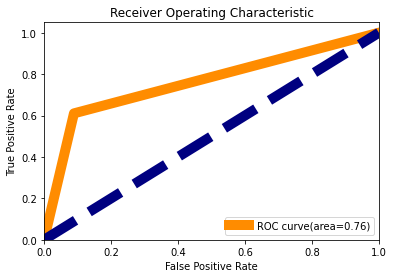

In [181]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 76%

CAT BOOST CLASSIFIER

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_res, y_train_res.ravel())
pred_test_cat = cat.predict(new_xtest)
pred_train_cat = cat.predict(x_train_res)
cat_score = cat.score(new_xtest,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.047292
0:	learn: 0.6608432	total: 64.1ms	remaining: 1m 4s
1:	learn: 0.6328584	total: 75.3ms	remaining: 37.6s
2:	learn: 0.6087792	total: 88.1ms	remaining: 29.3s
3:	learn: 0.5866453	total: 99.9ms	remaining: 24.9s
4:	learn: 0.5671993	total: 112ms	remaining: 22.2s
5:	learn: 0.5497894	total: 124ms	remaining: 20.5s
6:	learn: 0.5350880	total: 136ms	remaining: 19.3s
7:	learn: 0.5219764	total: 148ms	remaining: 18.3s
8:	learn: 0.5105534	total: 159ms	remaining: 17.6s
9:	learn: 0.5003623	total: 171ms	remaining: 16.9s
10:	learn: 0.4915388	total: 183ms	remaining: 16.4s
11:	learn: 0.4840539	total: 194ms	remaining: 16s
12:	learn: 0.4778050	total: 208ms	remaining: 15.8s
13:	learn: 0.4721785	total: 219ms	remaining: 15.4s
14:	learn: 0.4662982	total: 231ms	remaining: 15.1s
15:	learn: 0.4612322	total: 243ms	remaining: 14.9s
16:	learn: 0.4573202	total: 255ms	remaining: 14.7s
17:	learn: 0.4535215	total: 266ms	remaining: 14.5s
18:	learn: 0.4494701	total: 278ms	remaining: 14.3s
19:	learn

In [ ]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 90.24857674313736
Accuracy Score of Testing Data is: 83.26509723643808


In [ ]:
print(confusion_matrix(y_test,pred_test_cat))

[[3918  532]
 [ 449  963]]


In [ ]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4450
           1       0.64      0.68      0.66      1412

    accuracy                           0.83      5862
   macro avg       0.77      0.78      0.78      5862
weighted avg       0.84      0.83      0.83      5862



AUC-ROC CURVE:

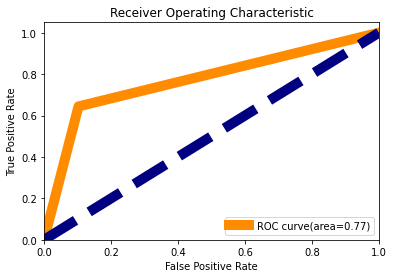

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 77%

EXTRA TREE CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_res, y_train_res.ravel())
pred_test_etc = etc.predict(new_xtest)
pred_train_etc = etc.predict(x_train_res)
etc_score = etc.score(new_xtest,y_test)
print('score of model is : ',etc_score*100)

score of model is :  81.49095871716138


In [ ]:
print(confusion_matrix(y_test,pred_test_etc))

[[3915  535]
 [ 550  862]]


In [ ]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4450
           1       0.62      0.61      0.61      1412

    accuracy                           0.81      5862
   macro avg       0.75      0.75      0.75      5862
weighted avg       0.81      0.81      0.81      5862



AUC-ROC CURVE:

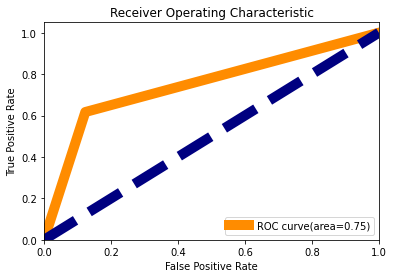

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_etc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 75%

ADA BOOST CLASSIFIER

In [157]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0,n_estimators=50,base_estimator=gb,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train_res, y_train_res.ravel())
pred_test_abc = abc.predict(new_xtest)
pred_train_abc = abc.predict(x_train_res)
abc_score = abc.score(new_xtest,y_test)
print('score of model is : ',abc_score*100)



score of model is :  80.29682702149437


In [158]:
print(confusion_matrix(y_test,pred_test_abc))

[[3567  883]
 [ 272 1140]]


In [159]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4450
           1       0.56      0.81      0.66      1412

    accuracy                           0.80      5862
   macro avg       0.75      0.80      0.76      5862
weighted avg       0.84      0.80      0.81      5862



AUC-ROC CURVE:

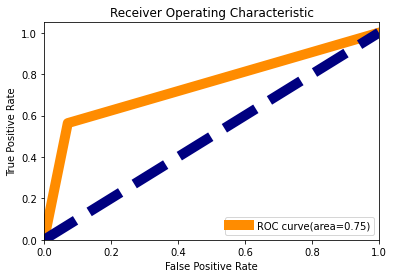

In [160]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_abc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 75%

XGBOOST

In [161]:
!pip install xgboost

In [162]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_res, y_train_res.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_res)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




score of model is :  80.4503582395087


In [164]:
print(confusion_matrix(y_test,pred_test_xgb))

[[3530  920]
 [ 226 1186]]


In [165]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4450
           1       0.56      0.84      0.67      1412

    accuracy                           0.80      5862
   macro avg       0.75      0.82      0.77      5862
weighted avg       0.85      0.80      0.82      5862



AUC-ROC CURVE:

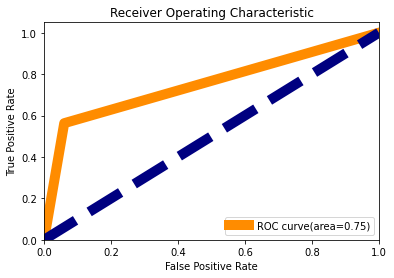

In [163]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 75%


VOTING CLASSIFIER

In [166]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('svc',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 ('dtc',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

HARD VOTING CLASSIFIER

In [167]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_h=vot_hard.predict(new_xtest)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[0 0 0 ... 1 0 0]
Hard Voting Score 0


SOFT VOTING CLASSIFIER

In [168]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft')
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_s=vot_hard.predict(new_xtest)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[0 0 0 ... 0 0 0]
Soft Voting Score 0


AUC-ROC CURVE:for Hard voting clasifier

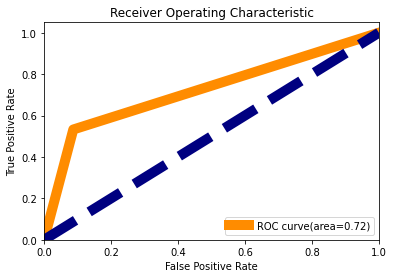

In [169]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_h,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%

AUC-ROC CURVE:for soft voting clasifier

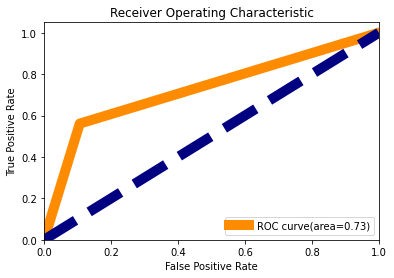

In [170]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_s,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

CONCLUSION


OUTPUT

In [183]:
import numpy as np
a=np.array(y_test)
predicted=np.array(cat.predict(new_xtest))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
5857,0,0
5858,0,0
5859,0,0
5860,0,0


PREDICTED RESULT

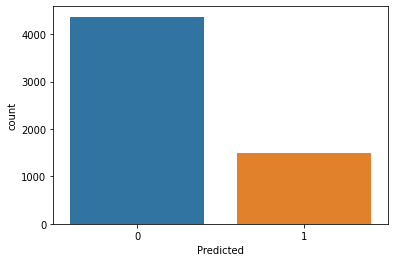

In [185]:
sns.countplot(x="Predicted", data=df_con)

ORIGINAL RESULT

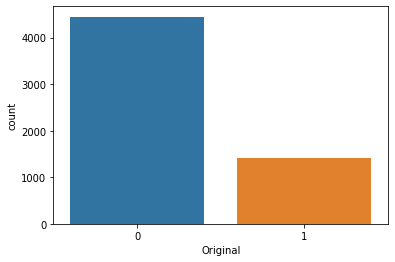

In [187]:
sns.countplot(x="Original", data=df_con)

THUS THE PREDICTED SEEMS ALMOST SAME LIKE ORIGINAL.SO OUR MODEL CATBOOST PERFORMS WELL

SAVE MODEL

In [188]:
import pickle
filename='Census_Income_Project_cat.pkl'
pickle.dump(cat,open(filename,'wb'))


In [189]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier','Soft Voting Classifier']
        

In [190]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred_vot_h)*100,
       accuracy_score(y_test,y_pred_vot_s)*100]
scores

[74.75264414875468,
 73.35380416240191,
 76.35619242579324,
 77.9767997270556,
 67.09314227226203,
 76.88502217673148,
 79.81917434322757,
 82.3439099283521,
 83.26509723643808,
 81.49095871716138,
 80.29682702149437,
 80.4503582395087,
 78.16444899351757,
 79.52917093142273]

In [191]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [192]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
9,CatBoostClassifier,83.265097
8,Light Gradient Boosting Classifier,82.343910
10,ExtraTreesClassifier,81.490959
12,XGBoost,80.450358
11,AdaBoost,80.296827
7,Gradient Boosting Classifier,79.819174
14,Soft Voting Classifier,79.529171
13,Voting classifier,78.164449
4,KNeighborsClassifier,77.976800
6,SVC,76.885022


From the above model CAT BOOST CLASSIFIER works well.Because CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees. The number of trees is controlled by the starting parameters.

So we save this model for prediction

From the analysis we can conclude that there are more number of people across all origin,sex,age,race earns only Income of <=50000.

only few people earns Income of >50000

And the Income of people mostly based on their education,working hours,gender and family




In [194]:
df_con.to_csv("Census_Income_Project.csv",sep='\t')